In [1]:
print("\033[1;32;43m Graphic Era Hill University \n Samarath Satyendra Choudhary  \n University Roll No. 2018023 \n")

 Graphic Era Hill University 
 Samarath Satyendra Choudhary  
 University Roll No. 2018023 



In [2]:
!pip install TextBlob tweepy  WordCloud


In [3]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
twitterApiKey  =  'AMOcU2nMUsctzcO7Wo3PbvcFY'
twitterApiSecret =  '06g2Q53UrcgzMyJcKwC9DkK9zAxUcsSol6LAUUYEdxl0Z3Gwx9'
twitterApiAccessToken =  '746408181643902976-U4STPAKUmzf1Xuub8FkmiYigZkE0hQt'
twitterApiAccessTokenSecret =  'nH6PUfkBgl8BtWqJoG4H5ZTKtOx9tq1gqqrnXYCAGW1Mg'


In [5]:
auth=  tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi  = tweepy.API(auth,wait_on_rate_limit = True)

In [6]:
twitterAccount = 'BillGates'

In [7]:
tweets  = tweepy.Cursor(twitterApi.user_timeline,
                        screen_name = twitterAccount,
                        count = None,
                        since_id = None,
                        max_id = None,trim_user = True,exclude_replies = True,contributor_details = False,
                        include_entitles=False).items(50);


In [8]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns = ['Tweet'])

Unexpected parameter: contributor_details
Unexpected parameter: include_entitles
Unexpected parameter: contributor_details
Unexpected parameter: include_entitles
Unexpected parameter: contributor_details
Unexpected parameter: include_entitles
Unexpected parameter: contributor_details
Unexpected parameter: include_entitles


In [9]:
df.head()

,Tweet
0,Today’s ruling makes it more challenging for t...
1,Being in New York is always fun – you never kn...
2,Here’s progress worth celebrating. More people...
3,1.7 billion people are affected by debilitatin...
4,How many tons of hydrogen does the world use e...


In [10]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt) 
    #removes stop words
    txt = re.sub(r'the', '', txt)
    txt = re.sub(r'and', '', txt)
    txt = re.sub(r'to', '', txt)
    return txt

In [11]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [12]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
df['Subjectivity']= df['Tweet'].apply(getTextSubjectivity)
df['Polarity']= df['Tweet'].apply(getTextPolarity)

In [14]:
df

,Tweet,Subjectivity,Polarity
0,Today’s ruling makes it more challenging for ...,0.750000,0.475000
1,Being in New York is always fun – you never kn...,0.468182,0.478788
2,Here’s progress worth celebrating. More people...,0.300000,0.400000
3,1.7 billion people are affected by debilitatin...,0.533333,0.166667
4,How many ns of hydrogen does world use each y...,0.500000,0.500000
5,If you want underst what’s going on with poli...,0.000000,0.000000
6,This is a sad day. Reversing Roe v. Wade is an...,1.000000,-0.500000
7,"Through renewed investments in malaria NTDs, ...",0.125000,0.000000
8,Daniel Boakye of has spent 45 years working o...,0.100000,-0.100000
9,When most people think about what produces gre...,0.500000,0.500000


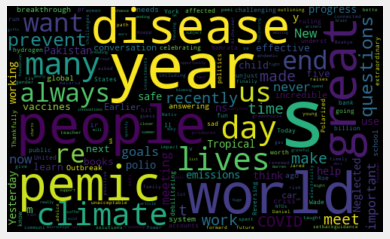

In [15]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [16]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [17]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"
#creates another column called Score and applies the function to the dataframe
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [18]:
df


,Tweet,Subjectivity,Polarity,Score
0,Today’s ruling makes it more challenging for ...,0.750000,0.475000,Positive
1,Being in New York is always fun – you never kn...,0.468182,0.478788,Positive
2,Here’s progress worth celebrating. More people...,0.300000,0.400000,Positive
3,1.7 billion people are affected by debilitatin...,0.533333,0.166667,Positive
4,How many ns of hydrogen does world use each y...,0.500000,0.500000,Positive
5,If you want underst what’s going on with poli...,0.000000,0.000000,Neutral
6,This is a sad day. Reversing Roe v. Wade is an...,1.000000,-0.500000,Negative
7,"Through renewed investments in malaria NTDs, ...",0.125000,0.000000,Neutral
8,Daniel Boakye of has spent 45 years working o...,0.100000,-0.100000,Negative
9,When most people think about what produces gre...,0.500000,0.500000,Positive


In [19]:
df['Score'].value_counts()


Positive    33
Neutral     15
Negative     2
Name: Score, dtype: int64

In [20]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values('Polarity') #Sort the tweets

for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Score'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweet'][i])
    print()
    j= j+1

Printing positive tweets:

1) Today’s ruling makes it more challenging for  US  hit its climate goals. It’s now more important than ever for… 

2) Being in New York is always fun – you never know who you’ll run in. It was great meeting you  Namrata! 

3) Here’s progress worth celebrating. More people have bank accounts than ever before:  

4) 1.7 billion people are affected by debilitating Neglected Tropical Diseases. Thankfully, an extraordinary public pr… 

5) How many ns of hydrogen does  world use each year?

6) When most people think about what produces greenhouse gas emissions, y think about cars  electricity. But … 

7) Important guidance from  founder  outlining  path forward on Alzheimer’s: 
▪️ More –  bette… 

8) I was recently asked what advice I would give  young people who want  make a positive impact on  world.

9) What a great meeting with WA’s teacher of  year, Jared Koepp. He taught me a lot about  challenges that Nativ… 

10) Yesterday, I had a chance  spend  day focu

In [21]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values('Polarity',ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Score'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) This is a sad day. Reversing Roe v. Wade is an unjust  unacceptable setback. And it puts women’s lives at risk,… 

2) Daniel Boakye of  has spent 45 years working on solutions for neglected tropical diseases, including riv… 



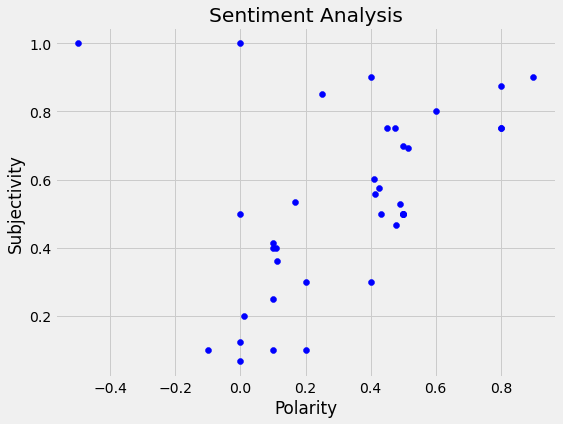

In [22]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [23]:
positive = df[df['Score'] == 'Positive']
print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")
pos = (positive.shape[0]/(df.shape[0])*100)
positive = df[df['Score'] == 'Neutral']
print(str(positive.shape[0]/(df.shape[0])*100) + " % of neutral tweets")
neu = (positive.shape[0]/(df.shape[0])*100)
positive = df[df['Score'] == 'Negative']
print(str(positive.shape[0]/(df.shape[0])*100) + " % of negative tweets")
neg = (positive.shape[0]/(df.shape[0])*100)

66.0 % of positive tweets
30.0 % of neutral tweets
4.0 % of negative tweets


(-1.1068791943269642,
 1.2056413447406982,
 -1.1047602197146342,
 1.1074430056341007)

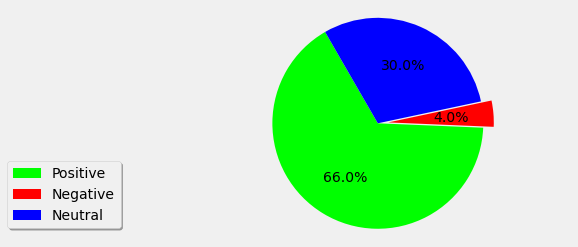

In [24]:
explode = (0,0.1,0)
labels = 'Positive','Negative','Neutral'
sizes =  [pos,neg,neu]
colors = ['lime', 'red', 'blue']
plt.pie(sizes,explode= explode,colors=colors,autopct='%1.1f%%',startangle =120)
plt.legend(labels,loc = (-0.5,0.05), shadow=True)
plt.axis('equal')

Text(0.5, 1.0, ' Sentiment Analysis ')

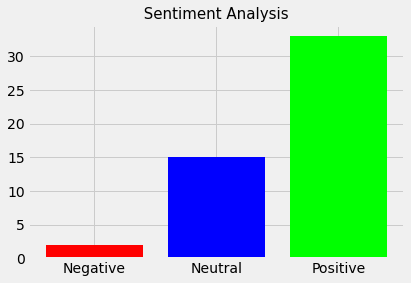

In [25]:
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values
plt.bar(labels, values, color = ['red', 'blue', 'lime'])
plt.title(label = " Sentiment Analysis ", 
                  fontsize = '15')